# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [2]:
# Update the PATH to include the user installation directory.
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [3]:
# Install requirements
!python -m pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 MB 8.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


## Imports

In [4]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [6]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize the images with mean and standard deviation
])

# Create training set and define training dataloader
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Create test set and define test dataloader
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 6042921.56it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 159510.80it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1504307.20it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6668018.47it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [7]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Training set:
6


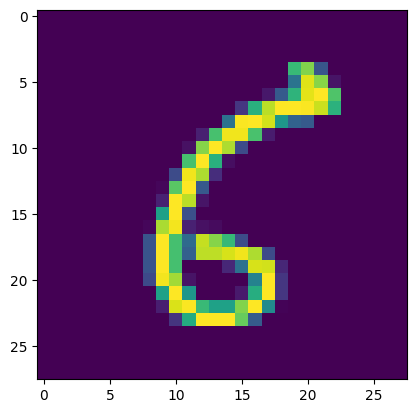

6


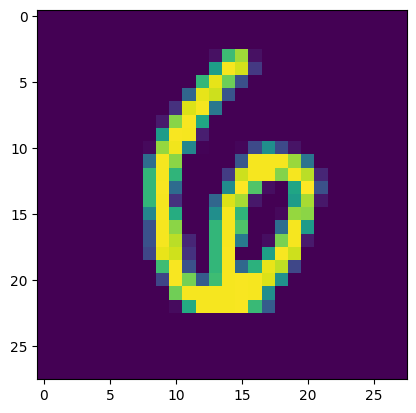

2


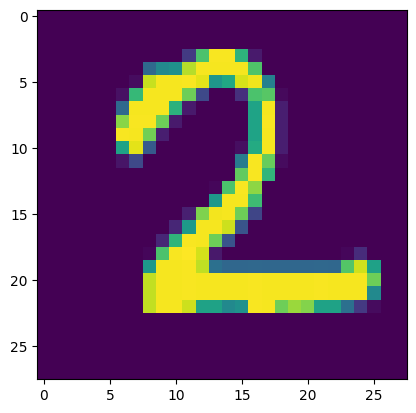

4


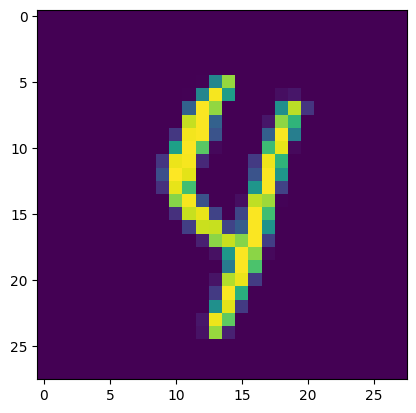

9


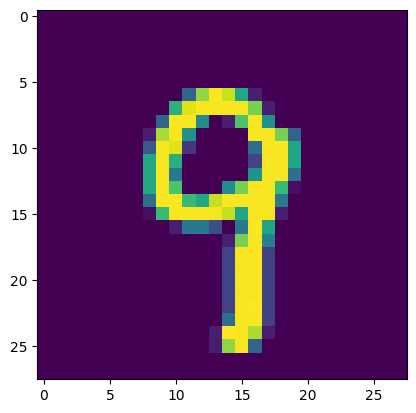

Test set:
7


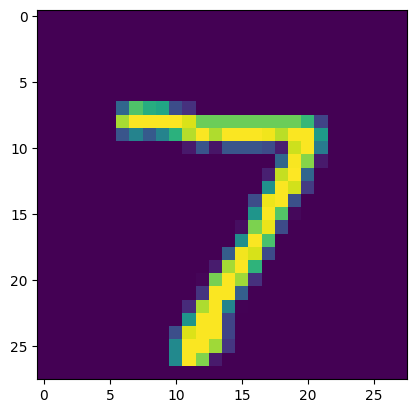

2


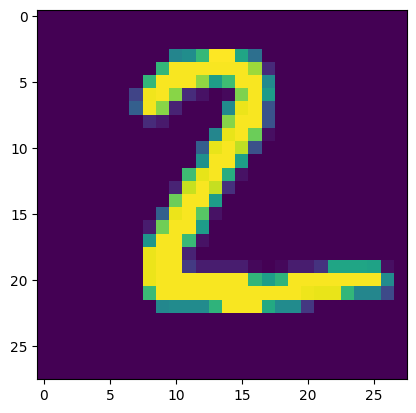

1


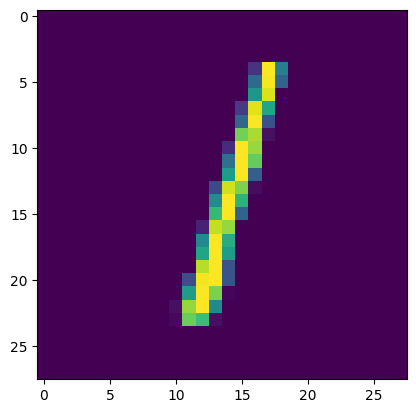

0


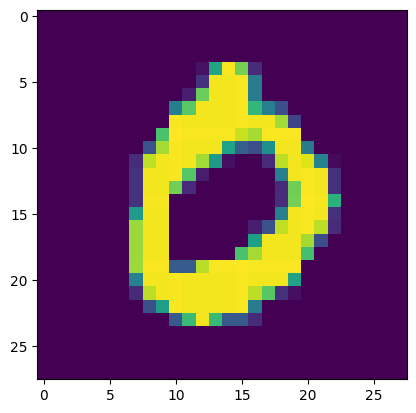

4


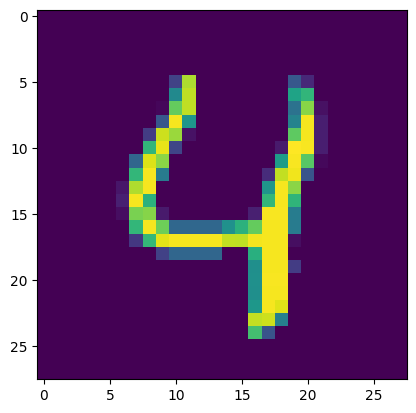

In [8]:
# Explore data
print("Training set:")
show5(trainloader)

print("Test set:")
show5(testloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()  # Flatten the input tensor
        self.fc1 = nn.Linear(28 * 28, 128)  # First fully connected layer
        self.fc2 = nn.Linear(128, 64)  # Second fully connected layer
        self.fc3 = nn.Linear(64, 10)  # Output layer (10 classes for 10 digits)

    def forward(self, x):
        x = self.flatten(x)  # Flatten the image
        x = F.relu(self.fc1(x))  # Apply ReLU activation
        x = F.relu(self.fc2(x))  # Apply ReLU activation
        x = self.fc3(x)  # Output layer (no activation, as it will be applied in loss function)
        return x
        # Instantiate the model
model = Net()

# Print the model architecture
print(model)

Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [11]:
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize the weights
            running_loss += loss.item()

        print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}')

# Train the model
train_model(model, trainloader, criterion, optimizer, epochs=5)

Epoch 1, Loss: 0.4321372644352252
Epoch 2, Loss: 0.1748158967495759
Epoch 3, Loss: 0.13062524634784758
Epoch 4, Loss: 0.10461507053491768
Epoch 5, Loss: 0.0891503962496522


Plot the training loss (and validation loss/accuracy, if recorded).

In [20]:
# Define the evaluate_model function without using device
def evaluate_model(model, test_loader):
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient calculation
        for images, labels in test_loader:
            outputs = model(images)  # Forward pass
            _, predicted = torch.max(outputs.data, 1)  # Get the class with the highest probability
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy}%')
    return accuracy

# Run the evaluation
evaluate_model(model, testloader)



Accuracy: 96.87%


96.87

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [21]:
# Ensure the model is already trained (train_model function was called
# Evaluate the model on the test set
accuracy = evaluate_model(model, testloader)

# Check if accuracy is over 90%
if accuracy > 90:
    print("Great work! The model's accuracy is over 90%.")
else:
    print("The model's accuracy is under 90%. You may need to make improvements.")



Accuracy: 96.87%
Great work! The model's accuracy is over 90%.


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [22]:
# Adjust hyperparameters
new_lr = 0.001
new_epochs = 10
new_batch_size = 128

# Update optimizer with new learning rate
optimizer = optim.SGD(model.parameters(), lr=new_lr, momentum=0.9)

# Train the model with adjusted hyperparameters
train_model(model, trainloader, criterion, optimizer, epochs=new_epochs)

# Evaluate the model on the test set again
accuracy_after_improvement = evaluate_model(model, testloader)

# Check improvement
if accuracy_after_improvement > accuracy:
    print(f"Accuracy improved from {accuracy}% to {accuracy_after_improvement}%. Keep iterating!")
else:
    print(f"Accuracy did not improve. Try different hyperparameters or strategies.")


Epoch 1, Loss: 0.052933660600441634
Epoch 2, Loss: 0.04780455173399331
Epoch 3, Loss: 0.04564640279621013
Epoch 4, Loss: 0.0439249259789091
Epoch 5, Loss: 0.04252136169921861
Epoch 6, Loss: 0.04135596315001151
Epoch 7, Loss: 0.03993022197466304
Epoch 8, Loss: 0.03892908550176853
Epoch 9, Loss: 0.03771596933375728
Epoch 10, Loss: 0.036687016933049356
Accuracy: 97.88%
Accuracy improved from 96.87% to 97.88%. Keep iterating!


## Saving your model
Using `torch.save`, save your model for future loading.

In [23]:
# Define the file path
PATH = "mnist_model.pth"

# Save the model
torch.save(model, PATH)

# Optionally, save only the model state dictionary
state_dict_path = "mnist_model_state_dict.pth"
torch.save(model.state_dict(), state_dict_path)

print(f"Model saved to {PATH}")


Model saved to mnist_model.pth
